<a href="https://colab.research.google.com/github/micaelakorol21/water_quality/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

<h1>Clasificación de Agua Potable</h1>
<h2>🚰El objetivo de este proyecto es predecir si una muestra de agua es potable basándonos en características físico-químicas y ambientales.</h2>

In [3]:
df = pd.read_csv('https://media.githubusercontent.com/media/micaelakorol21/dataset_water_quality/refs/heads/main/Water_quality.csv')

<p style="font-size:20px;">🔍Exploración de los datos:</p>

In [365]:
df.shape
# El dataset poseé: 24 columnas y 698.575 filas.

(698575, 24)

In [366]:
# Observamos los tipos de datos de cada columna:
df.dtypes

Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object

In [367]:
# Observamis las columnas que tienen datos faltantes:
df.isna().sum()

Index                         0
pH                        13438
Iron                       4684
Nitrate                   12430
Chloride                  20467
Lead                       3107
Zinc                      18498
Color                       660
Turbidity                  5798
Fluoride                  21996
Copper                    23291
Odor                      20782
Sulfate                   22746
Conductivity              19210
Chlorine                   6709
Manganese                 12832
Total Dissolved Solids      205
Source                    10324
Water Temperature         19779
Air Temperature            3555
Month                     11292
Day                       11628
Time of Day               13565
Target                        0
dtype: int64

In [42]:
# Calculamos el maximo valor faltante:
max_missing = df.isna().sum().max()
print(f"El valor maximo de faltantes es de {max_missing}")

El valor maximo de faltantes es de 19584


<b style='font-size:22px'>Renombramos las columnas</b>

In [8]:
df = df.rename(columns={
    'Index': 'Índice',
    'pH': 'pH',
    'Iron': 'Plata',
    'Nitrate': 'Nitrato',
    'Chloride': 'Cloruros',
    'Lead': 'Plomo',
    'Zinc': 'Zinc',
    'Color': 'Color',
    'Turbidity': 'Turbidez',
    'Fluoride': 'Fluoruro',
    'Copper': 'Cobre',
    'Odor': 'Olor',
    'Sulfate': 'Sulfatos',
    'Conductivity': 'Conductividad',
    'Chlorine': 'Cloro residual libre',
    'Manganese': 'Manganeso',
    'Total Dissolved Solids': 'Sólidos disueltos totales',
    'Source': 'Fuente',
    'Water Temperature': 'Temperatura del agua',
    'Air Temperature': 'Temperatura del aire',
    'Month': 'Mes',
    'Day': 'Día',
    'Time of Day': 'Hora del día',
    'Target': 'Objetivo'
})

<b style="font-size:16px">El conjunto de datos incluye 24 columnas, de las cuales 23 son variables predictoras y 1 es la variable objetivo que indica si el agua <b style='color:red'> es potable (1) o no (0)  </b> .</b>

In [372]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')

<b style="font-size:22px;"> Análisis de la variable objetivo: Objetivo</b>

In [374]:
# Conteo de clases
df['Objetivo'].value_counts()

Objetivo
0    457841
1    240734
Name: count, dtype: int64

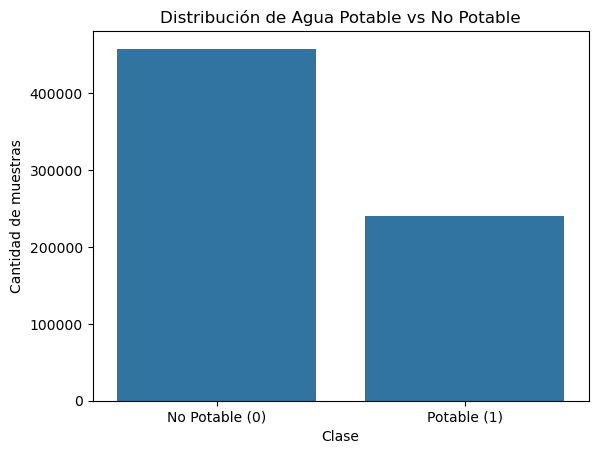

In [375]:
sns.countplot(data=df, x='Objetivo')
plt.title('Distribución de Agua Potable vs No Potable')
plt.xticks([0, 1], ['No Potable (0)', 'Potable (1)'])
plt.ylabel('Cantidad de muestras')
plt.xlabel('Clase')
plt.show()

<b style='font-size:16px'>El dataset está desbalanceado: hay más muestras de agua no potable (457841) que de agua potable (240734).</b>

<b style="font-size:22px">Análisis de la columna pH </b>

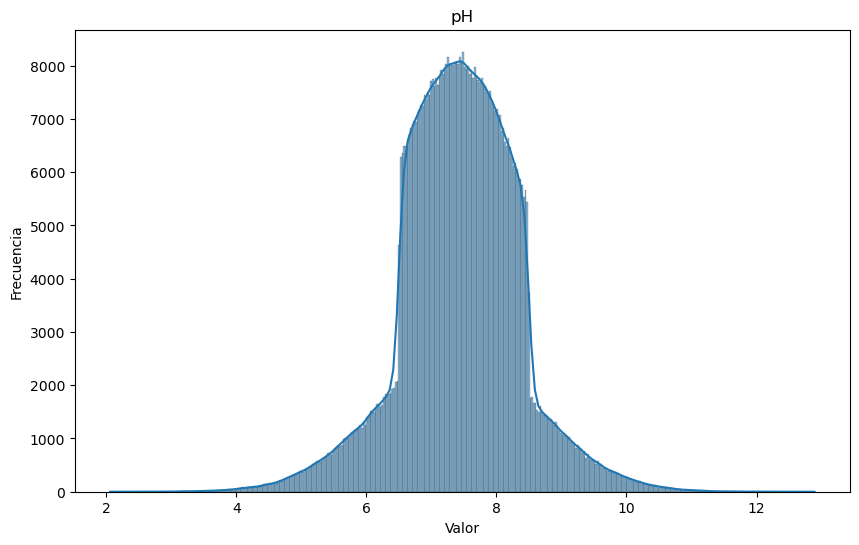

In [378]:
# Observamos la distribuición de la columna pH:
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [379]:
df['pH'].describe()

count    685137.000000
mean          7.442448
std           0.911493
min           2.058008
25%           6.880107
50%           7.447080
75%           8.023730
max          12.891960
Name: pH, dtype: float64

In [380]:
#Eliminar outliers de la fila pH
col = 'pH' 
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
# Eliminamos las filas que contienen valores en la columna pH que están fuera del rango definido
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
df['pH'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['pH'].describe()

count    667067.000000
mean          7.449839
std           0.803099
min           5.164678
25%           6.899036
50%           7.450028
75%           8.010550
max           9.739132
Name: pH, dtype: float64

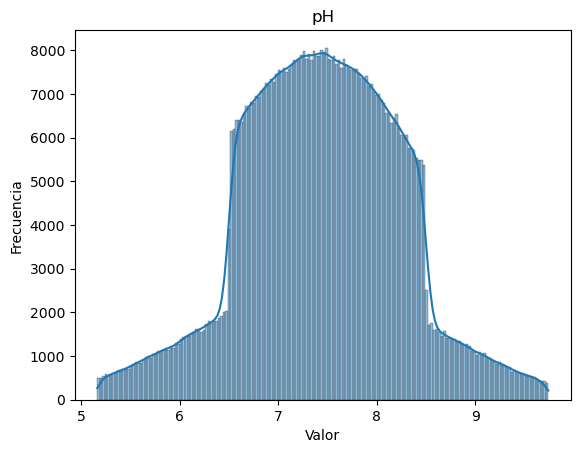

In [381]:
plt.figure()
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show() # ¿no es mejor usar z score?

<p>Análisis de pH 📝 Después de eliminar los valores nulos y los outliers en la columna pH, se observaron variaciones significativas en las estadísticas descriptivas. Se eliminaron aproximadamente 29,870 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, hubo un ligero aumento, pasando de 7.45 a 7.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por debajo del promedio general. La desviación estándar también se redujo notablemente de 0.85 a 0.73, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo cambió de 2.06 a 5.36 y el máximo de 12.89 a 9.57, lo que confirma que se eliminaron los valores más extremos en ambos extremos del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable</p>

In [383]:
df.isna().sum()

Índice                           0
pH                               0
Plata                         4463
Nitrato                      11923
Cloruros                     19596
Plomo                         2973
Zinc                         17623
Color                          627
Turbidez                      5573
Fluoruro                     21014
Cobre                        22180
Olor                         19865
Sulfatos                     21776
Conductividad                18344
Cloro residual libre          6398
Manganeso                    12222
Sólidos disueltos totales      194
Fuente                        9846
Temperatura del agua         18890
Temperatura del aire          3413
Mes                          10792
Día                          11096
Hora del día                 12955
Objetivo                         0
dtype: int64

<b style="font-size:22px">Análisis de la columna: Plata </b>

In [385]:
df['Plata'].describe()

count    6.626040e+05
mean     1.320244e-01
std      4.859343e-01
min      8.010000e-45
25%      1.010000e-05
50%      2.325443e-03
75%      5.635290e-02
max      1.574860e+01
Name: Plata, dtype: float64

In [386]:
col_p = 'Plata'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    5.562300e+05
mean     1.553449e-02
std      3.011400e-02
min      8.010000e-45
25%      2.530000e-06
50%      5.901445e-04
75%      1.409545e-02
max      1.408669e-01
Name: Plata, dtype: float64


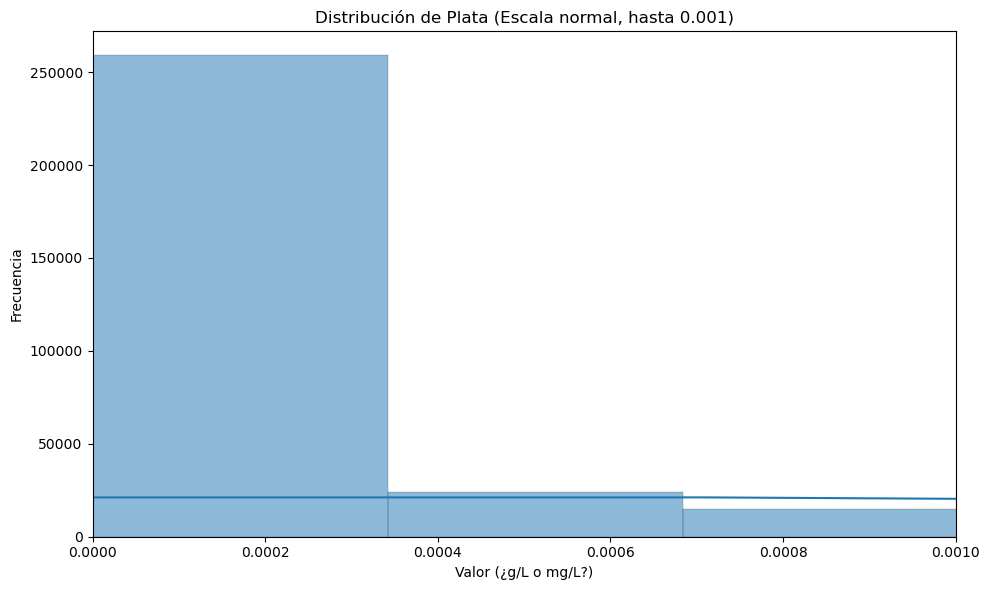

In [387]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normal acotado hasta 0.001
sns.histplot(df['Plata'], kde=True, ax=ax)

# Acotar eje X para observar mejor valores pequeños
ax.set_xlim(0, 0.001)

# Agregar títulos y etiquetas
ax.set_title('Distribución de Plata (Escala normal, hasta 0.001)')
ax.set_xlabel('Valor (¿g/L o mg/L?)')  # Cambiar al confirmar la unidad
ax.set_ylabel('Frecuencia')

# Ajustar presentación
plt.tight_layout()
plt.show()

<b style="font-size:22px">Análisis de la columna: Nitrato </b>

In [389]:
df['Nitrato'].describe()

count    546223.000000
mean          6.136038
std           3.215009
min           0.286173
25%           3.966220
50%           5.595346
75%           7.636367
max          73.072931
Name: Nitrato, dtype: float64

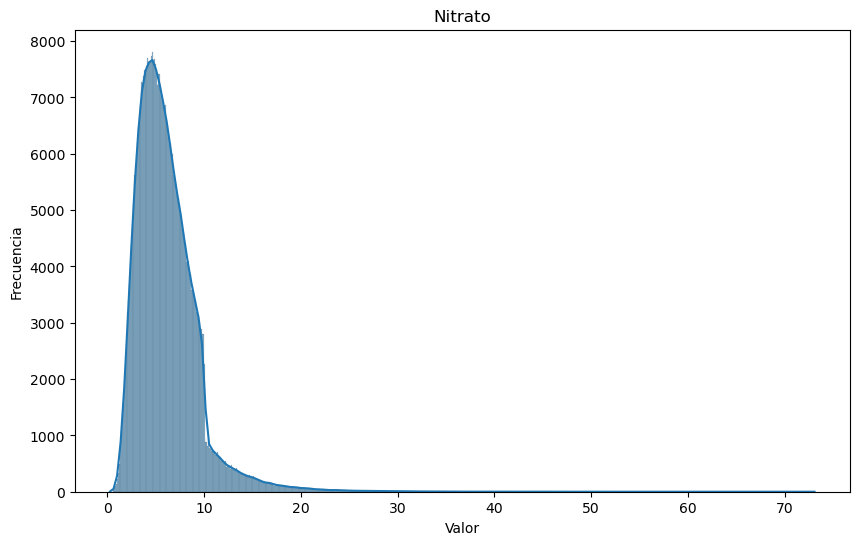

In [390]:
# Observamos la distribuición de la columna Nitrato:

plt.figure(figsize=(10, 6))
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [391]:
df['Nitrato'].describe()

count    546223.000000
mean          6.136038
std           3.215009
min           0.286173
25%           3.966220
50%           5.595346
75%           7.636367
max          73.072931
Name: Nitrato, dtype: float64

In [392]:
#Eliminar outliers de la columna Nitrato

col2 = 'Nitrato'  # ejemplo
Q1 = df[col2].quantile(0.25)
Q3 = df[col2].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col2] >= Q1 - 1.5 * IQR) & (df[col2] <= Q3 + 1.5 * IQR)]
df['Nitrato'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Nitrato'].describe()

count    528853.000000
mean          5.767487
std           2.383792
min           0.286173
25%           3.913698
50%           5.485218
75%           7.403927
max          13.141506
Name: Nitrato, dtype: float64

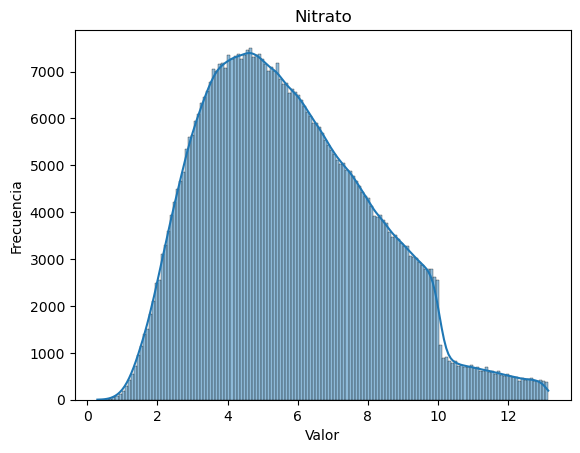

In [393]:
plt.figure()
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Nitrato 📝 Después de eliminar los valores nulos y los outliers, se eliminaron aproximadamente 17,370 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 6.13 a 5.76, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 3.21 a 2.28, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 73.07 a 13.14, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 45 mg/l, hay que evaluar que unidad maneja el dataset para coincidir con el promedio aprox.</p>

<b style="font-size:22px">Análisis de la columna: Cloruros</b>

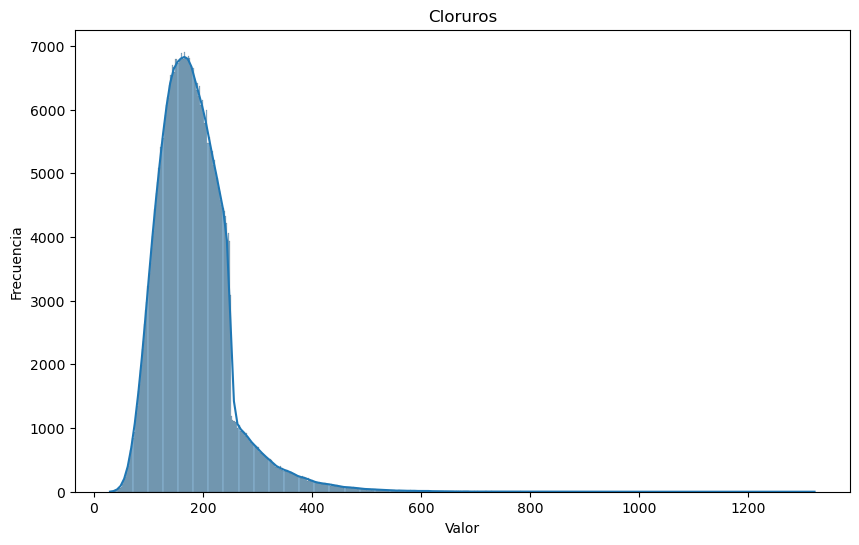

In [396]:
# Observamos la distribuición de la columna Cloruros:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [397]:
df['Cloruros'].describe()

count    513336.000000
mean        182.680492
std          66.684631
min          29.413497
25%         137.754491
50%         175.145528
75%         216.356432
max        1321.276280
Name: Cloruros, dtype: float64

In [398]:
#Eliminar outliers de la fila Cloruros

col3 = 'Cloruros'  # ejemplo
Q1 = df[col3].quantile(0.25)
Q3 = df[col3].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col3] >= Q1 - 1.5 * IQR) & (df[col3] <= Q3 + 1.5 * IQR)]
df['Cloruros'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Cloruros'].describe()

count    497619.000000
mean        175.570696
std          52.556628
min          29.413497
25%         136.522537
50%         172.881639
75%         212.068579
max         334.247076
Name: Cloruros, dtype: float64

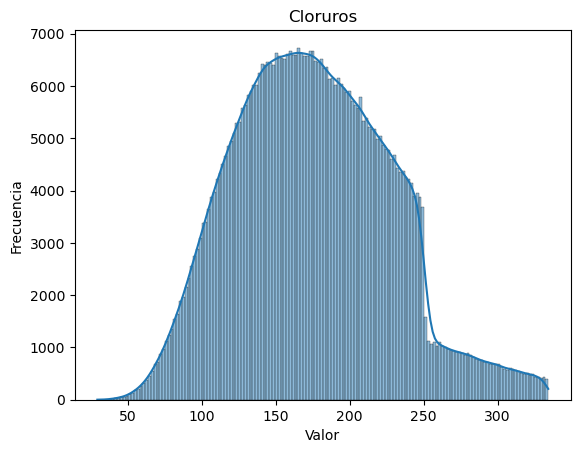

In [399]:
plt.figure()
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Cloruros 📝 Después de eliminar los valores nulos y los outliers, se eliminaron 15,717 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 182.68 a 175.57, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 66.58 a 52.55, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 1321 a 334, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 200 mg/l, se considera que utiliza esta unidad ya que tiene coherencia.</p>

<b style="font-size:22px">Análisis de la columna: Zinc</b>

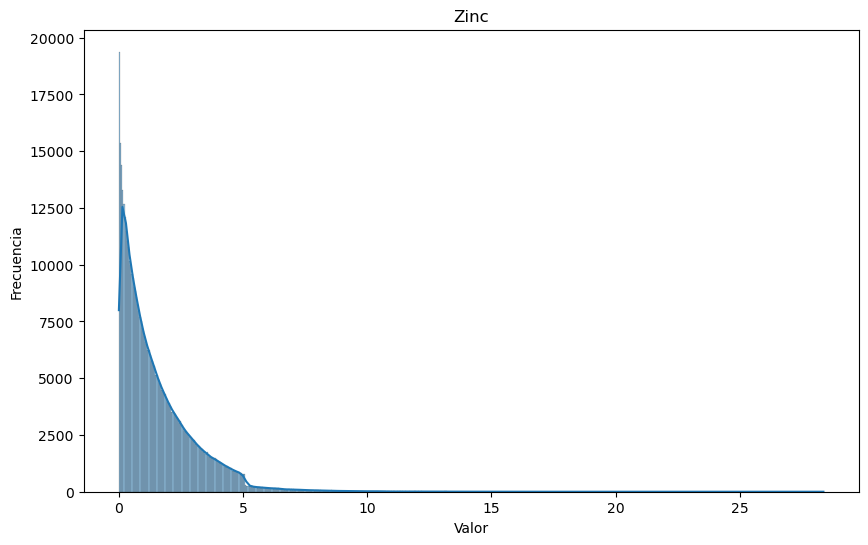

In [402]:
# Observamos la distribuición de la columna Zinc:
plt.figure(figsize=(10, 6))
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [403]:
df['Zinc'].describe()

count    484563.000000
mean          1.531481
std           1.505043
min           0.000001
25%           0.415094
50%           1.078573
75%           2.217501
max          28.368672
Name: Zinc, dtype: float64

In [404]:
#Eliminar outliers de la fila Zinc

col5 = 'Zinc'  # ejemplo
Q1 = df[col5].quantile(0.25)
Q3 = df[col5].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col5] >= Q1 - 2.5 * IQR) & (df[col5] <= Q3 + 2.5 * IQR)]
df['Zinc'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Zinc'].describe()

count    479969.000000
mean          1.463140
std           1.325814
min           0.000001
25%           0.409845
50%           1.062825
75%           2.172168
max           6.722317
Name: Zinc, dtype: float64

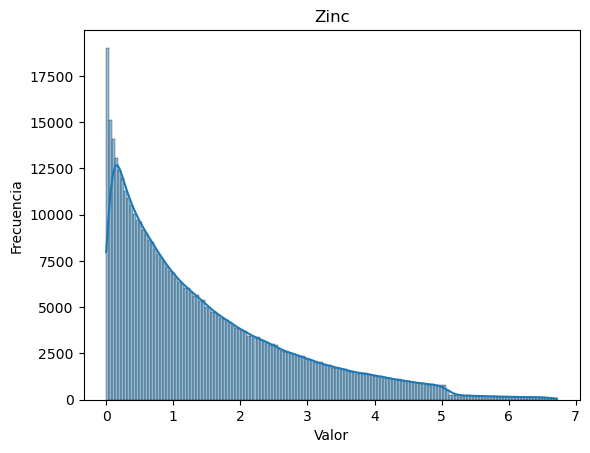

In [405]:
#Volvemos a graficar
plt.figure()
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Zinc 📝 Después de eliminar los valores nulos y los outliers, se eliminaron solo 4,594 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 1.53 a 1.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 1.50 a 1.42, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 28.36 a 6.72, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 5 mg/l, se considera que utiliza esta unidad ya que tiene coherencia.</p>

<b style='font-size:22px'> Análisis de la columna: Plomo </b>

In [408]:
df['Plomo'].describe()

count     4.777910e+05
mean      1.292366e-03
std       3.047505e-02
min       0.000000e+00
25%      9.495000e-123
50%       1.340000e-62
75%       2.920000e-27
max       3.251502e+00
Name: Plomo, dtype: float64

<p>La variable "Plomo" contiene principalmente números muy pequeños, con un promedio de 0.0013 y una desviación estándar de 0.0305. Dado que los valores son tan bajos, aplicamos una transformación logarítmica para comprimir los valores y mejorar la distribución, facilitando su análisis y modelado posterior.</p>

In [410]:
df['Plomo'] = df['Plomo'] + 1e-10  # evitar log(0)

# Aplicar el logaritmo natural
df['Plomo'] = np.log(df['Plomo'])

In [411]:
# Eliminamos outliers:

col_p = 'Plomo'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
#Analizo si quedó algún valor nulo: 
df['Plomo'].isna().sum()
print(df[col_p].describe())

count    3.652780e+05
mean    -2.302585e+01
std      1.224906e-10
min     -2.302585e+01
25%     -2.302585e+01
50%     -2.302585e+01
75%     -2.302585e+01
max     -2.302585e+01
Name: Plomo, dtype: float64


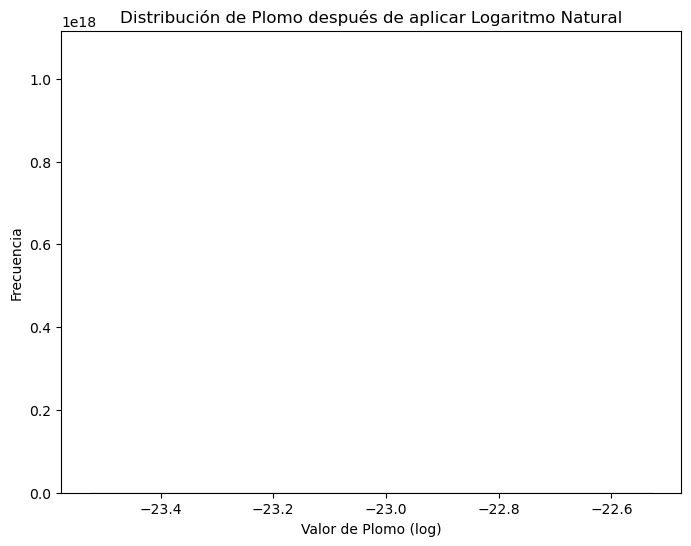

In [412]:
# Visualización con histograma:
plt.figure(figsize=(8, 6))
sns.histplot(df['Plomo'], kde=True, bins=50)
plt.title('Distribución de Plomo después de aplicar Logaritmo Natural')
plt.xlabel('Valor de Plomo (log)')
plt.ylabel('Frecuencia')
plt.show()

<p>La transformación logarítmica expandió la escala de los valores pequeños, mostrando la alta concentración de valores de "Plomo" cercanos a cero en un pico negativo. A pesar de esto, la distribución sigue siendo significativamente no normal, con la mayoría de los datos agrupados en valores muy bajos.
</p>

<b style='font-size:22px'> Análisis de la columna: Manganeso </b>

In [415]:
df['Manganeso'].describe()

count    3.585660e+05
mean     9.068824e-02
std      4.338723e-01
min      1.380000e-46
25%      1.990000e-06
50%      5.167845e-04
75%      1.298552e-02
max      1.526468e+01
Name: Manganeso, dtype: float64

<p> La variable "Manganeso" tiene un promedio de 0.091, con una gran variabilidad (desviación estándar de 0.432). La mayoría de los valores son muy pequeños, con un mínimo de 1.38e-46, pero hay algunos valores altos, como 15.26, lo que sugiere la presencia de valores extremos.
<br>
Aplicaré el logaritmo natural para reducir la variabilidad y hacer la distribución más estable, facilitando el análisis.
</p>

In [417]:
df['Manganeso'] = df['Manganeso'] + 1e-10  # evitar log(0)
# Aplicar el logaritmo natural
df['Manganeso'] = np.log(df['Manganeso'])

In [418]:
# Eliminamos los Outliers:
col_p = 'Manganeso'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    358566.000000
mean         -9.264822
std           6.458520
min         -23.025851
25%         -13.127326
50%          -7.567884
75%          -4.343920
max           2.725541
Name: Manganeso, dtype: float64


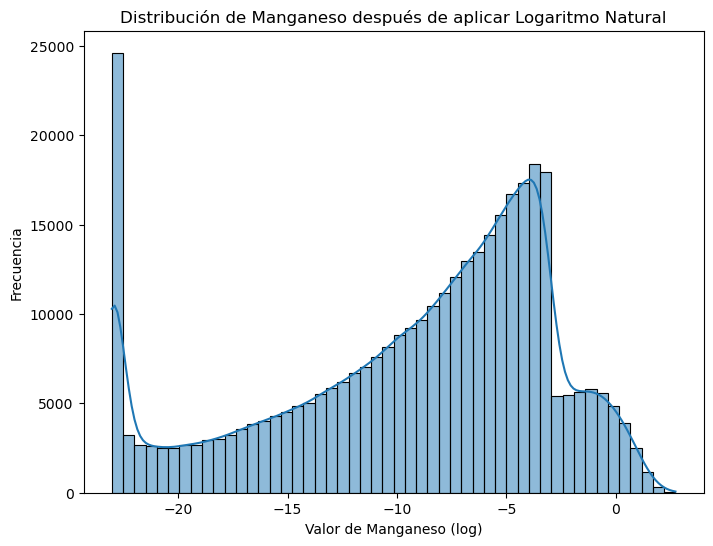

In [419]:
# Visualización con histograma 
plt.figure(figsize=(8, 6))
sns.histplot(df['Manganeso'], kde=True, bins=50)
plt.title('Distribución de Manganeso después de aplicar Logaritmo Natural')
plt.xlabel('Valor de Manganeso (log)')
plt.ylabel('Frecuencia')
plt.show()

<p> El Manganeso original tenía muchos valores muy pequeños. Después del logaritmo, la distribución ahora tiene dos picos: uno para los valores originales casi cero y otro para valores un poco más grandes. No se volvió normal, sino que muestra dos grupos distintos. Hay una gran cantidad de muestras con niveles de Manganeso casi indetectables, y otro grupo (más pequeño) con niveles de Manganeso que son significativamente mayores que cero </p>

<b style='font-size:22px'> Análisis de la columna: Turbidez </b>

In [422]:
df['Turbidez'].describe()

count    3.555600e+05
mean     4.770435e-01
std      8.542950e-01
min      9.180000e-14
25%      3.663792e-02
50%      1.982096e-01
75%      5.876508e-01
max      1.877892e+01
Name: Turbidez, dtype: float64

<p>La variable Turbidez muestra una distribución sesgada, con valores mayoritariamente bajos y algunos extremos altos (mínimo: 9.18e-14, máximo: 19.29). Se aplica una transformación logarítmica para reducir la asimetría, facilitar su análisis y representar mejor su comportamiento en el modelo.:</p>

In [424]:
df['Turbidez'] = df['Turbidez'] + 1e-10  # evitar log(0)
# Aplicamos el logaritmo natural
df['Turbidez'] = np.log(df['Turbidez'])

In [425]:
#Eliminamos los Outliers:
col_p = 'Turbidez'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    340344.000000
mean         -1.900274
std           1.898886
min          -7.469195
25%          -3.014385
50%          -1.512249
75%          -0.490195
max           2.932735
Name: Turbidez, dtype: float64


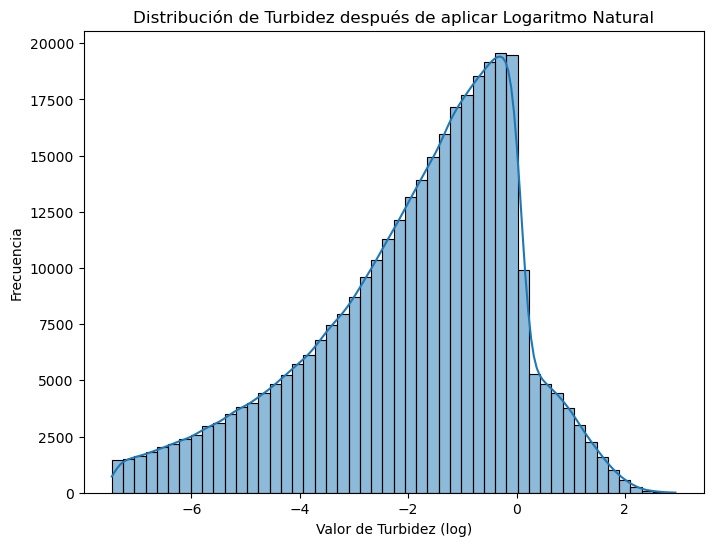

In [426]:
# Visualización con histograma y KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['Turbidez'], kde=True, bins=50)
plt.title('Distribución de Turbidez después de aplicar Logaritmo Natural')
plt.xlabel('Valor de Turbidez (log)')
plt.ylabel('Frecuencia')
plt.show()

<p>La transformación logarítmica de la columna 'Turbidez' ha comprimido el rango de valores y reducido la fuerte asimetría positiva original, concentrando la mayoría de las observaciones en valores logarítmicos bajos. Sin embargo, la distribución sigue mostrando una alta frecuencia en valores transformados cercanos a cero, indicando que la mayoría de las lecturas originales de turbidez eran muy bajas, con una cola que se extiende hacia valores logarítmicos más altos correspondientes a los picos de turbidez.</p>

<b style='font-size:22px'> Análisis de la columna: Cobre </b>

In [429]:
df['Cobre'].describe()

count    3.289890e+05
mean     4.890678e-01
std      5.571855e-01
min      2.360000e-07
25%      1.254059e-01
50%      3.374519e-01
75%      6.750670e-01
max      8.923312e+00
Name: Cobre, dtype: float64

<p>La variable Cobre muestra una distribución sesgada, con valores mayoritariamente bajos y algunos extremos altos (mínimo: 5.41e-08, máximo: 11.39). Se aplica una transformación logarítmica para reducir la asimetría, facilitar su análisis y representar mejor su comportamiento en el modelo.</p>

In [431]:
df['Cobre'] = df['Cobre'] + 1e-10  # evitar log(0)

# Aplicamos el logaritmo natural
df['Cobre'] = np.log(df['Cobre'])
print(df['Cobre'].describe())

count    328989.000000
mean         -1.393918
std           1.451944
min         -15.259010
25%          -2.076199
50%          -1.086332
75%          -0.392943
max           2.188667
Name: Cobre, dtype: float64


In [432]:
#Eliminamos los Outliers:
col_p = 'Cobre'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    317407.000000
mean         -1.230799
std           1.170649
min          -4.601082
25%          -1.940303
50%          -1.032456
75%          -0.370127
max           2.129079
Name: Cobre, dtype: float64


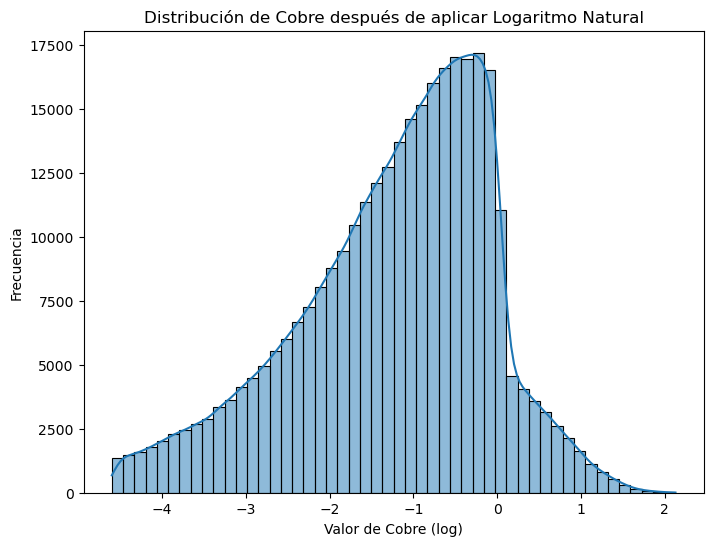

In [433]:
# Visualización con histograma 
plt.figure(figsize=(8, 6))
sns.histplot(df['Cobre'], kde=True, bins=50)
plt.title('Distribución de Cobre después de aplicar Logaritmo Natural')
plt.xlabel('Valor de Cobre (log)')
plt.ylabel('Frecuencia')
plt.show()

<p>El gráfico resultante muestra cómo la transformación logarítmica mejora la simetría de la distribución de los datos de Cobre, acercándola a una distribuición más normal. </p>

<b style="font-size:22px">Análisis de columnas: Fluoruro, Olor, Sulfatos:</b>

In [12]:
columnas = ['Fluoruro','Olor','Sulfatos']

In [14]:
df[columnas].describe()

,Fluoruro,Olor,Sulfatos
count,676579.000000,677793.000000,675829.000000
mean,0.979317,1.819002,146.957252
std,0.844840,1.080435,70.158037
min,0.000005,0.011006,14.550941
25%,0.376890,0.898739,97.947809
50%,0.782693,1.786702,134.903881
75%,1.358150,2.677523,182.649513
max,12.486697,4.141991,1393.433430


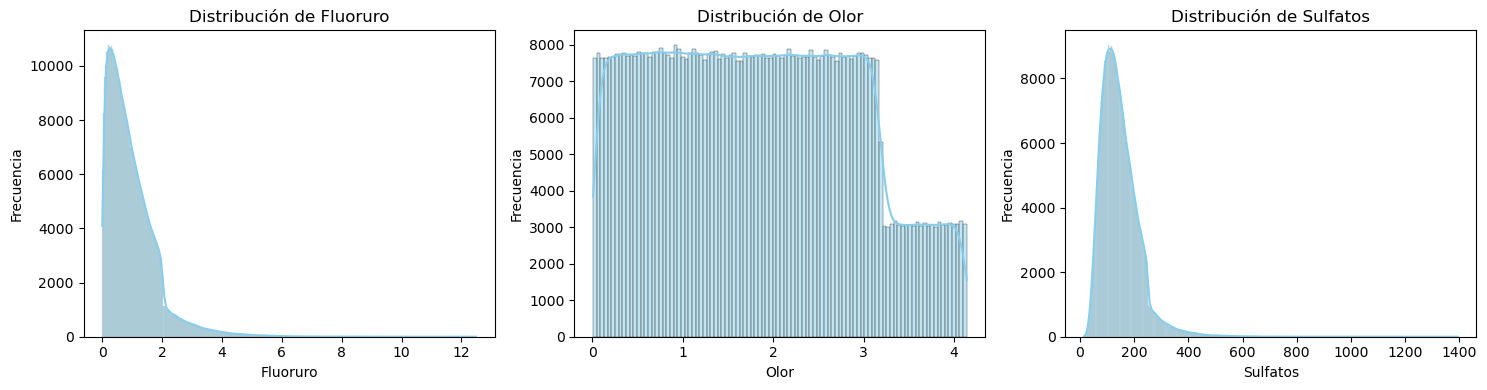

In [16]:
# Grafico las columnas:'Fluoruro','Olor','Sulfatos':
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [40]:
# Aplicamos IQR a las columnas a análizar:
cols = ['Fluoruro','Olor','Sulfatos']
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    df[cols].describe()

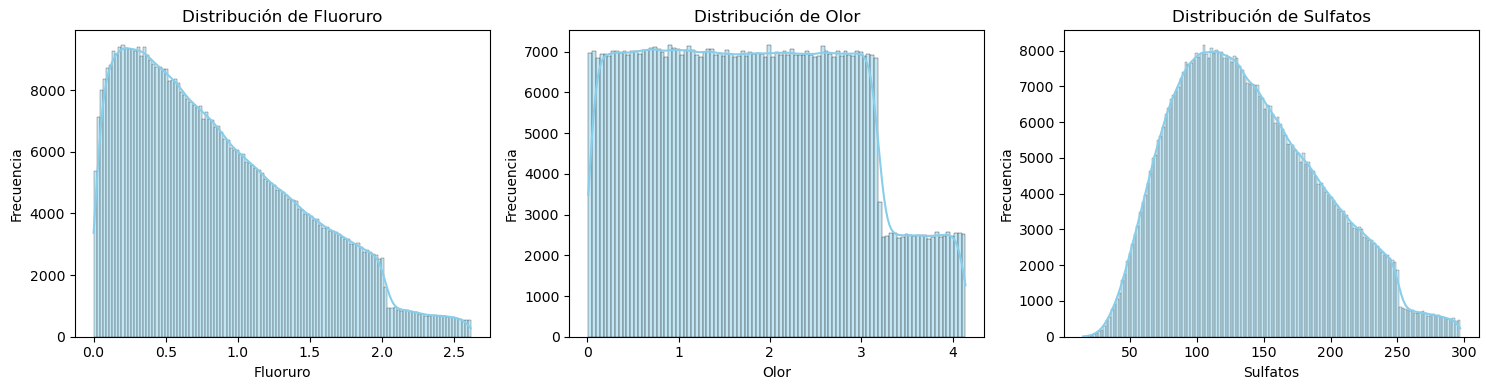

In [27]:
# Grafico de las columnas:'Fluoruro','Olor','Sulfatos':
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [441]:
df.isna().sum()

Índice                          0
pH                              0
Plata                           0
Nitrato                         0
Cloruros                        0
Plomo                           0
Zinc                            0
Color                         261
Turbidez                        0
Fluoruro                        0
Cobre                           0
Olor                            0
Sulfatos                        0
Conductividad                7513
Cloro residual libre         2699
Manganeso                       0
Sólidos disueltos totales      70
Fuente                       4035
Temperatura del agua         7747
Temperatura del aire         1399
Mes                          4413
Día                          4571
Hora del día                 5279
Objetivo                        0
dtype: int64

<b style="font-size:22px">Análisis de columnas: Conductividad, Cloro residual libre, Sólidos disueltos totales:</b>

In [443]:
columnas2 = ['Conductividad','Cloro residual libre','Sólidos disueltos totales']

In [444]:
df[columnas2].describe()

,Conductividad,Cloro residual libre,Sólidos disueltos totales
count,265902.000000,270716.000000,273345.000000
mean,424.627834,3.223443,263.534201
std,189.628534,0.700844,152.924710
min,13.054824,0.999411,0.010965
25%,286.220910,2.733265,131.953644
50%,396.985426,3.191123,262.724821
75%,533.096948,3.671227,392.357286
max,1708.196692,10.351240,579.797750


In [445]:
#IQR
cols2 = ['Conductividad', 'Cloro residual libre', 'Sólidos disueltos totales'] 
for col in cols2:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

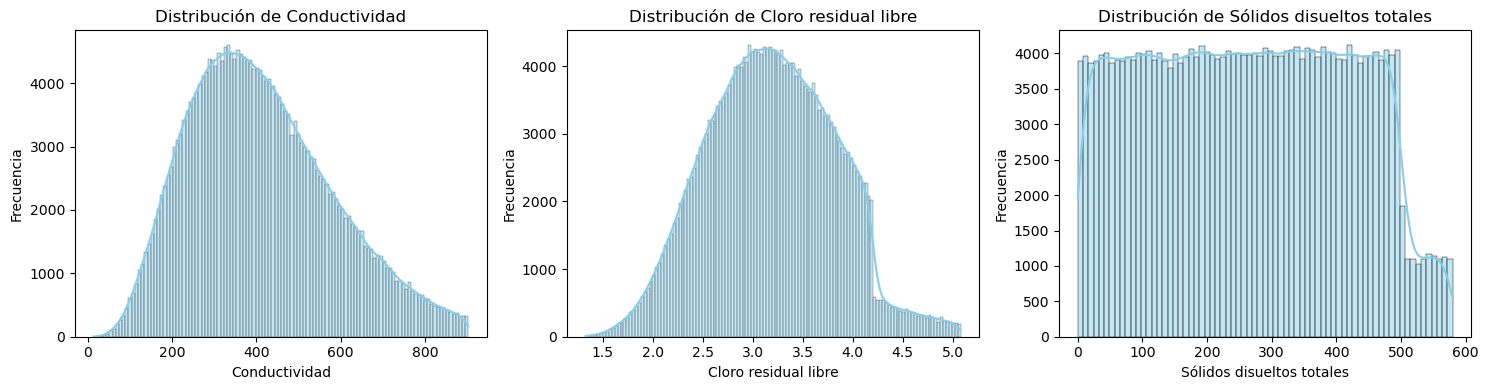

In [446]:
#Gráficamos las columnas: 'Conductividad','Cloro residual libre','Sólidos disueltos totales'
fig, axes = plt.subplots(1, len(columnas2), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas2):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<b style="font-size:22px">Análisis de columna: Temperatura del agua</b>

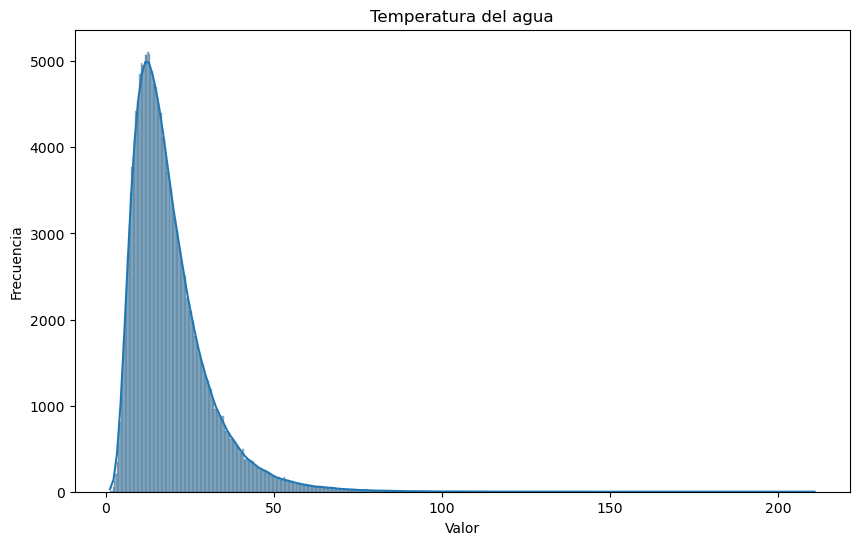

In [448]:
# Observamos la distribuición de la columna Temp. del Agua:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperatura del agua'], kde=True)
plt.title('Temperatura del agua')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [449]:
df['Temperatura del agua'].describe()

count    247257.000000
mean         19.126895
std          11.377048
min           1.274254
25%          11.333743
50%          16.438346
75%          23.821705
max         210.821909
Name: Temperatura del agua, dtype: float64

In [450]:
#Eliminamos los Outliers:

col9 = 'Temperatura del agua'  # ejemplo
Q1 = df[col9].quantile(0.25)
Q3 = df[col9].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col9] >= Q1 - 1.5 * IQR) & (df[col9] <= Q3 + 1.5 * IQR)]
df['Temperatura del agua'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Temperatura del agua'].describe()

count    236843.000000
mean         17.576217
std           8.412359
min           1.274254
25%          11.124519
50%          15.965618
75%          22.611062
max          42.553119
Name: Temperatura del agua, dtype: float64

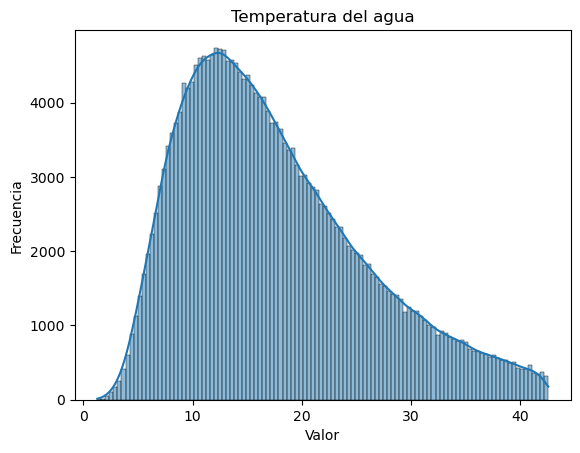

In [451]:
# Volvemos a graficar
plt.figure()
sns.histplot(df['Temperatura del agua'], kde=True)
plt.title('Temperatura del agua')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Después de eliminar los valores nulos y los outliers, los datos de las temperaturas muestran una reducción en la cantidad de registros, con una disminución tanto en la media como en la desviación estándar. La temperatura del agua experimentó una baja en la media, pasando de 19.13 a 17.58, lo que indica que los valores extremos estaban influyendo en el promedio. También se observó una notable reducción en el valor máximo, que bajó de 210.82 a 42.51, reflejando la eliminación de outliers muy altos.</p>

<b style="font-size:22px">Análisis de columna: Temperatura del aire</b>

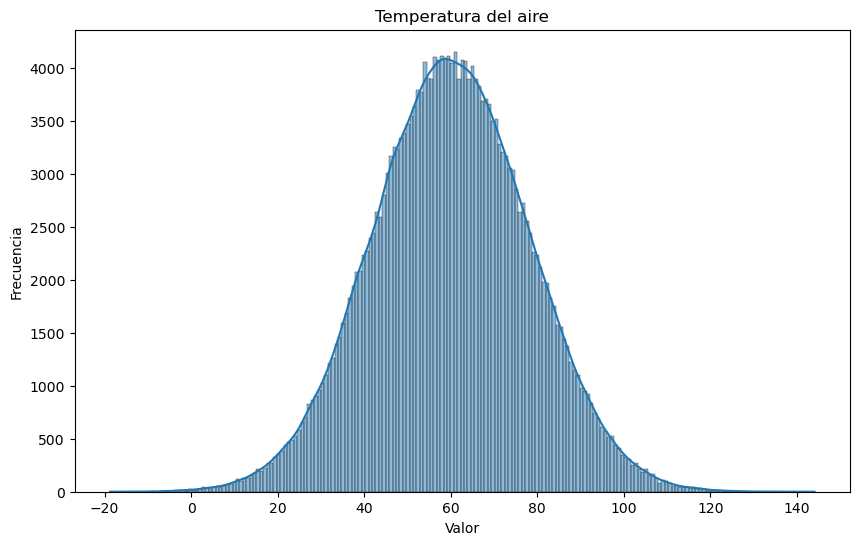

In [454]:
# Observamos la distribuición de la columna Temp. del Aire:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperatura del aire'], kde=True)
plt.title('Temperatura del aire')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [455]:
df['Temperatura del aire'].describe()

count    235612.000000
mean         60.056348
std          18.044924
min         -18.747927
25%          47.855957
50%          60.005179
75%          72.221352
max         144.078518
Name: Temperatura del aire, dtype: float64

In [456]:
#Eliminamos los Outliers:

col10 = 'Temperatura del aire'  # ejemplo
Q1 = df[col10].quantile(0.25)
Q3 = df[col10].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col10] >= Q1 - 1.5 * IQR) & (df[col10] <= Q3 + 1.5 * IQR)]
df['Temperatura del aire'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Temperatura del aire'].describe()

count    233921.000000
mean         60.058983
std          17.507198
min          11.308434
25%          47.964075
50%          60.006630
75%          72.124111
max         108.766126
Name: Temperatura del aire, dtype: float64

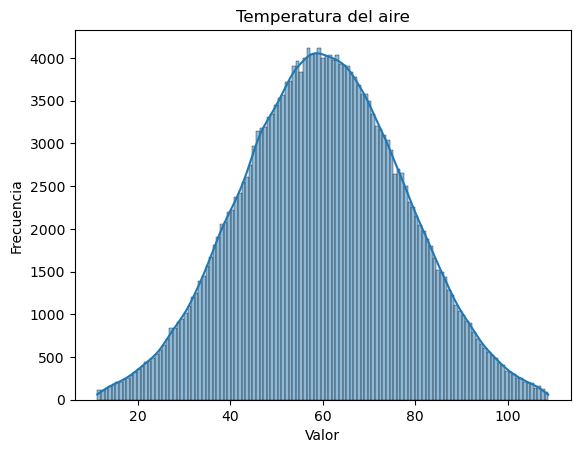

In [457]:
# Volvemos a graficar
plt.figure()
sns.histplot(df['Temperatura del aire'], kde=True)
plt.title('Temperatura del aire')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [458]:
df.isna().sum()

Índice                          0
pH                              0
Plata                           0
Nitrato                         0
Cloruros                        0
Plomo                           0
Zinc                            0
Color                         221
Turbidez                        0
Fluoruro                        0
Cobre                           0
Olor                            0
Sulfatos                        0
Conductividad                   0
Cloro residual libre            0
Manganeso                       0
Sólidos disueltos totales       0
Fuente                       3452
Temperatura del agua            0
Temperatura del aire            0
Mes                          3805
Día                          3915
Hora del día                 4574
Objetivo                        0
dtype: int64

<p>En cuanto a la temperatura del aire, la media prácticamente se mantuvo igual, pero el máximo también disminuyó de 140.88 a 108.70, sugiriendo que los valores extremos fueron eliminados.</p>

<h1>Sección categorica:</h1>

<b style="font-size:22px">Análisis de columna: Meses</b>

In [578]:
print(df['Mes'].unique())
total_meses = df['Mes'].count()
print("Total de registros con Mes válido:", total_meses)

['April', 'March', 'January', 'July', 'September', ..., 'October', 'November', 'August', 'December', 'February']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']
Total de registros con Mes válido: 226507


In [579]:
# Elimino los valores nulos
df = df[df['Mes'].notna()]
# Ordeno los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

C:\Users\Micae\AppData\Local\Temp\ipykernel_12784\1691330805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_meses.index, y=conteo_meses.values, palette="viridis")


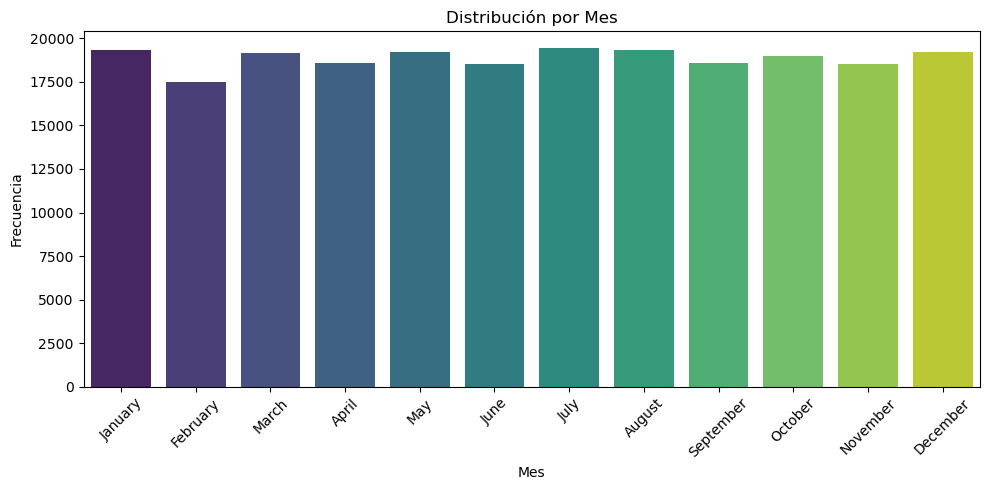

In [582]:
conteo_meses = df['Mes'].value_counts().reindex(orden_meses)
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_meses.index, y=conteo_meses.values, palette="viridis")
plt.title("Distribución por Mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p>Convertimos las variables categóricas en formato numérico para poder usarlas en modelos. (Encoding) Se aplica Label Encoding con orden cronológico ya que este es útil para conservar el orden de los meses y usarlo en modelos que consideren relaciones ordinales</p>

In [585]:
#Este código toma la columna categórica 'Mes', define un orden específico para los meses y luego crea una nueva columna numérica
#'Mes_encoded' que representa los meses con números basados en ese orden. Esto prepara los datos para su uso en modelos de aprendizaje
# automático que requieren entrada numérica.

df['Mes'] = pd.Categorical(df['Mes'], categories=orden_meses, ordered=True)
df['Mes_encoded'] = df['Mes'].cat.codes

df[['Mes', 'Mes_encoded']].head()

,Mes,Mes_encoded
2,April,3
3,March,2
9,January,0
14,July,6
16,September,8


<b style="font-size:22px">Análisis de columna: Color</b>

<p>La variable Color representa la apariencia visual del agua y puede estar relacionada con la presencia de contaminantes orgánicos o inorgánicos. Dado que estas categorías tienen una progresión lógica (desde "Colorless" hasta "Yellow"), se convierte a una variable categórica ordinal con el siguiente orden:

'Colorless' < 'Near Colorless' < 'Faint Yellow' < 'Light Yellow' < 'Yellow'. Este orden refleja un aumento en la intensidad del color, útil para modelos que aprovechan relaciones ordinales.</p>

In [589]:
print(df['Color'].unique())
total_meses = df['Color'].count()
print("Total de registros con Mes válido:", total_meses)

['Colorless', 'Near Colorless', 'Yellow', 'Light Yellow', 'Faint Yellow']
Categories (5, object): ['Colorless' < 'Near Colorless' < 'Faint Yellow' < 'Light Yellow' < 'Yellow']
Total de registros con Mes válido: 226507


In [591]:
# Elimino los valores nulos
df = df[df['Color'].notna()]
# Este orden sigue la escala estándar de color del agua tipo Pt-Co (Platinum-Cobalt), donde un número bajo indica agua más clara.
orden_color = ['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow', 'Yellow']

C:\Users\Micae\AppData\Local\Temp\ipykernel_12784\3820033657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_color.index, y=conteo_color.values, palette="viridis")


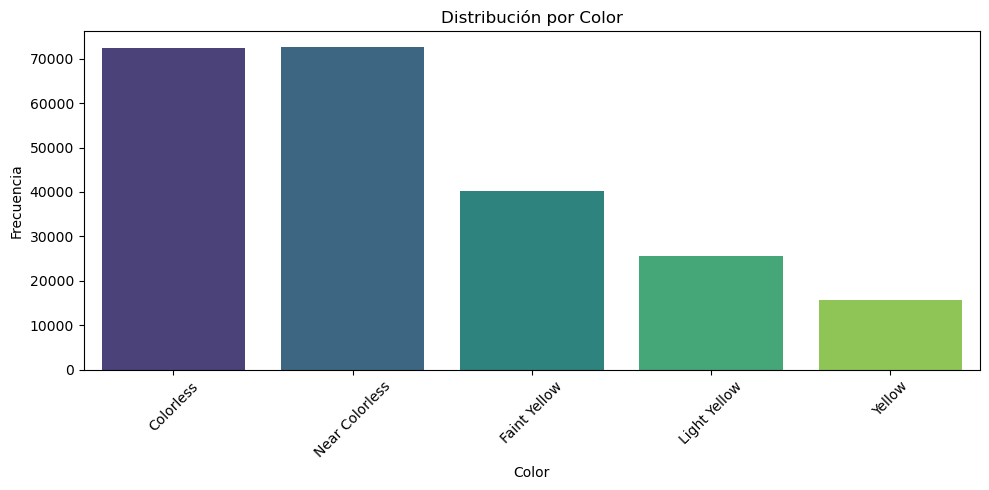

In [593]:
conteo_color = df['Color'].value_counts().reindex(orden_color)
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_color.index, y=conteo_color.values, palette="viridis")
plt.title("Distribución por Color")
plt.xlabel("Color")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p>Convertimos las variables categóricas en formato numérico para poder usarlas en modelos. (Encoding) Se aplica Label Encoding con orden cronológico ya que este es útil para conservar el orden de los meses y usarlo en modelos que consideren relaciones ordinales </p>

In [596]:
# Este código convierte la columna categórica 'Color' en una variable ordinal,
# definiendo un orden lógico basado en la intensidad del color del agua,
# desde 'Colorless' (agua más clara) hasta 'Yellow' (más intensa).
# Luego, se crea una nueva columna 'Color_encoded' con valores numéricos (0 a 4)
# que permiten utilizar esta variable en modelos de aprendizaje automático que requieren datos numéricos.
df['Color'] = pd.Categorical(df['Color'], categories=orden_color, ordered=True)
df['Color_encoded'] = df['Color'].cat.codes

df[['Color', 'Color_encoded']].head()

,Color,Color_encoded
2,Colorless,0
3,Colorless,0
9,Near Colorless,1
14,Colorless,0
16,Yellow,4


<b style="font-size:22px">Análisis de columna: Fuente</b>

In [599]:
print(df['Fuente'].unique())
total_fuentes = df['Fuente'].count()
print("Total de registros con Fuente son:", total_fuentes)

['Reservoir' 'Spring' 'Well' 'Stream' 'Aquifer' 'Ground' 'River' 'Lake']
Total de registros con Fuente son: 226507


In [601]:
# Elimino los valores nulos
df = df[df['Fuente'].notna()]

C:\Users\Micae\AppData\Local\Temp\ipykernel_12784\3653201019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_fuentes.index, y=conteo_fuentes.values, palette="viridis")


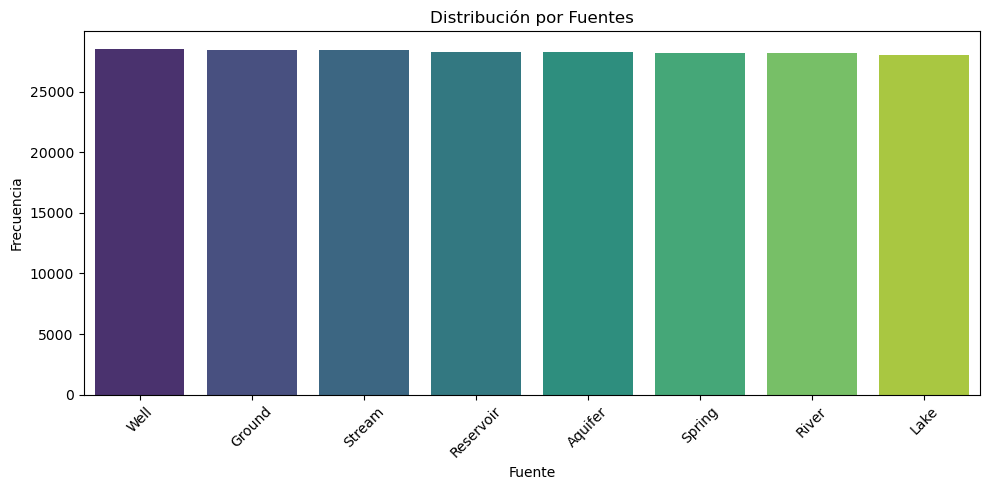

In [603]:
conteo_fuentes = df['Fuente'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_fuentes.index, y=conteo_fuentes.values, palette="viridis")
plt.title("Distribución por Fuentes")
plt.xlabel("Fuente")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [605]:
# En el gráfico se visualizan casi iguales, confirmo con esto
conteo_fuentes = df['Fuente'].value_counts()
print(conteo_fuentes)
# Hay diferencias entre estos por lo tanto mantengo las Fuentes

Fuente
Well         28568
Ground       28491
Stream       28430
Reservoir    28326
Aquifer      28266
Spring       28234
River        28168
Lake         28024
Name: count, dtype: int64


In [607]:
# La variable 'Fuente' representa la procedencia del agua (ej. río, pozo, lago, etc.).
# Dado que estas categorías no tienen un orden lógico intrínseco, se consideran variables categóricas nominales.
# Para su uso en modelos de machine learning, se recomienda aplicar One-Hot Encoding.
df_fuente_encoded = pd.get_dummies(df['Fuente'], prefix='Fuente')
df = pd.concat([df, df_fuente_encoded], axis=1)

In [609]:
# Veo si estan todas las columnas
print(df.columns[df.columns.str.startswith('Fuente_')])

Index(['Fuente_Aquifer', 'Fuente_Ground', 'Fuente_Lake', 'Fuente_Reservoir',
       'Fuente_River', 'Fuente_Spring', 'Fuente_Stream', 'Fuente_Well',
       'Fuente_Aquifer', 'Fuente_Ground', 'Fuente_Lake', 'Fuente_Reservoir',
       'Fuente_River', 'Fuente_Spring', 'Fuente_Stream', 'Fuente_Well'],
      dtype='object')


In [611]:
# Verifico que el encoding esté bien hecho : Coincide con el valor original de Fuente.
df[['Fuente', 'Fuente_Reservoir', 'Fuente_Spring', 'Fuente_River', 'Fuente_Stream',
    'Fuente_Aquifer', 'Fuente_Lake', 'Fuente_Ground', 'Fuente_Well']].head(10)

,Fuente,Fuente_Reservoir,Fuente_Reservoir,Fuente_Spring,Fuente_Spring,Fuente_River,Fuente_River,Fuente_Stream,Fuente_Stream,Fuente_Aquifer,Fuente_Aquifer,Fuente_Lake,Fuente_Lake,Fuente_Ground,Fuente_Ground,Fuente_Well,Fuente_Well
2,Reservoir,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Spring,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
9,Spring,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
14,Spring,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
16,Well,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
17,Stream,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
33,Aquifer,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
38,Well,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
41,Aquifer,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
47,Stream,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [613]:
# Chequeo la suma total : da OK al original
print(df[['Fuente_Reservoir', 'Fuente_Spring', 'Fuente_River', 'Fuente_Stream',
          'Fuente_Aquifer', 'Fuente_Lake', 'Fuente_Ground', 'Fuente_Well']].sum())

Fuente_Reservoir    28326
Fuente_Reservoir    28326
Fuente_Spring       28234
Fuente_Spring       28234
Fuente_River        28168
Fuente_River        28168
Fuente_Stream       28430
Fuente_Stream       28430
Fuente_Aquifer      28266
Fuente_Aquifer      28266
Fuente_Lake         28024
Fuente_Lake         28024
Fuente_Ground       28491
Fuente_Ground       28491
Fuente_Well         28568
Fuente_Well         28568
dtype: int64


In [615]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo',
       'Mes_encoded', 'Color_encoded', 'Fuente_Aquifer', 'Fuente_Ground',
       'Fuente_Lake', 'Fuente_Reservoir', 'Fuente_River', 'Fuente_Spring',
       'Fuente_Stream', 'Fuente_Well', 'Fuente_Aquifer', 'Fuente_Ground',
       'Fuente_Lake', 'Fuente_Reservoir', 'Fuente_River', 'Fuente_Spring',
       'Fuente_Stream', 'Fuente_Well'],
      dtype='object')

In [645]:
# Elimino las columnas que no son relevantes para el objetivo del modelo: 'Hora del día', 'Día'

In [647]:
df = df.drop(columns=['Día', 'Hora del día'])

In [649]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Objetivo', 'Mes_encoded',
       'Color_encoded', 'Fuente_Aquifer', 'Fuente_Ground', 'Fuente_Lake',
       'Fuente_Reservoir', 'Fuente_River', 'Fuente_Spring', 'Fuente_Stream',
       'Fuente_Well', 'Fuente_Aquifer', 'Fuente_Ground', 'Fuente_Lake',
       'Fuente_Reservoir', 'Fuente_River', 'Fuente_Spring', 'Fuente_Stream',
       'Fuente_Well'],
      dtype='object')

In [658]:
df.dtypes

Índice                        float64
pH                            float64
Plata                         float64
Nitrato                       float64
Cloruros                      float64
Plomo                         float64
Zinc                          float64
Color                        category
Turbidez                      float64
Fluoruro                      float64
Cobre                         float64
Olor                          float64
Sulfatos                      float64
Conductividad                 float64
Cloro residual libre          float64
Manganeso                     float64
Sólidos disueltos totales     float64
Fuente                         object
Temperatura del agua          float64
Temperatura del aire          float64
Mes                          category
Objetivo                      float64
Mes_encoded                      int8
Color_encoded                    int8
Fuente_Aquifer                   bool
Fuente_Ground                    bool
Fuente_Lake 

<b style="font-size:22px">Estandarización de columnas solo de variables numéricas:</b>

In [33]:
scaler = StandardScaler()

In [46]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])
print(df[columnas_numericas].describe())

             Índice            pH         Plata       Nitrato      Cloruros  \
count  5.879930e+05  5.766610e+05  5.840420e+05  5.774930e+05  5.707380e+05   
mean  -5.877757e-17  2.553050e-17  6.812934e-18 -4.330980e-18  1.593542e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.925789e+00 -6.086760e+00 -2.663654e-01 -1.809081e+00 -2.266246e+00   
25%   -7.230000e-01 -6.211484e-01 -2.663449e-01 -6.756990e-01 -6.731387e-01   
50%    5.297158e-02  5.298685e-03 -2.616462e-01 -1.711984e-01 -1.200564e-01   
75%    8.551231e-01  6.417336e-01 -1.520155e-01  4.620990e-01  4.941721e-01   
max    1.606225e+00  6.153863e+00  3.301125e+01  2.059649e+01  1.826356e+01   

              Plomo          Zinc      Turbidez      Fluoruro         Cobre  \
count  5.853780e+05  5.723890e+05  5.831390e+05  5.879930e+05  5.684090e+05   
mean  -1.320635e-17  8.242653e-18 -1.364697e-17 -2.610188e-17 -2.080092e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.

<b font-size:26px>🧪 Conclusión Final: <br>
Se aplicó una transformación logarítmica a las variables con notación científica para reducir su sesgo y valores extremos. Posteriormente, se estandarizaron todas las variables numéricas para que tengan una media de 0 y una desviación estándar de 1. Esta estandarización es crucial al utilizar modelos de clasificación, ya que garantiza que todas las características contribuyan de manera equitativa al modelo.</b>